Importación de librerias para tratar y limpiar datos:

In [1]:
import pandas as pd
import numpy as np 

Importación de librerias para gráficos:

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

## 3. DATASET
Para seguir comparando y contrastando información, sigo con la obtención de datos. Mi fuente sigue siendo FAO.org el enlace donde se descarga el dataset: http://www.fao.org/faostat/en/#data . Dicho dataset lo descarlo como csv y lo copio en la misma carpeta donde voy a trabajar.

In [3]:
df = pd.read_csv("FAOSTAT_data_8-10-2020.csv",encoding="ISO-8859-1",date_parser="Year")  
df

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),221,"Almonds, with shell",2007,2007,7021,Annual value,LCU,887.4,NaN,Official data
1,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),515,Apples,2007,2007,7021,Annual value,LCU,422.5,NaN,Official data
2,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),526,Apricots,2007,2007,7021,Annual value,LCU,671.0,NaN,Official data
3,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),366,Artichokes,2007,2007,7021,Annual value,LCU,590.0,NaN,Official data
4,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),367,Asparagus,2007,2007,7021,Annual value,LCU,1460.9,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),205,Vetches,2012,2012,7021,Annual value,LCU,263.6,NaN,Official data
327,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),222,"Walnuts, with shell",2012,2012,7021,Annual value,LCU,2771.7,NaN,Official data
328,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),567,Watermelons,2012,2012,7021,Annual value,LCU,204.0,NaN,Official data
329,PP,Producer Prices,203,Spain,5530,Producer Price (LCU/tonne),15,Wheat,2012,2012,7021,Annual value,LCU,247.9,NaN,Official data


In [4]:
df.Item.value_counts()

Almonds, with shell                             3
Olives                                          3
Tangerines, mandarins, clementines, satsumas    3
Groundnuts, with shell                          3
Chick peas                                      3
                                               ..
Meat live weight, turkey                        2
Millet                                          2
Meat, duck                                      2
Cotton lint                                     1
Poppy seed                                      1
Name: Item, Length: 114, dtype: int64

In [4]:
df = df.loc[:,["Area","Item","Year","Value"]]
df

,Area,Item,Year,Value
0,Spain,"Almonds, with shell",2007,887.4
1,Spain,Apples,2007,422.5
2,Spain,Apricots,2007,671.0
3,Spain,Artichokes,2007,590.0
4,Spain,Asparagus,2007,1460.9
...,...,...,...,...
326,Spain,Vetches,2012,263.6
327,Spain,"Walnuts, with shell",2012,2771.7
328,Spain,Watermelons,2012,204.0
329,Spain,Wheat,2012,247.9


Como ya sabemos cuales son los años claves para el análisis los comparo en Precio producto (LCU/tonelada), siendo LCU la unidad de materia del país.

In [5]:
year_price_2007 = df[df.Year == 2007] 
year_price_2008 = df[df.Year == 2008] 
year_price_2012 = df[df.Year == 2012] 

In [6]:
Spain_price = df[df.Area == 'Spain'] 
year_price_2007= Spain_price[Spain_price.Year == 2007]
year_price_2007 = year_price_2007.loc[:,["Item","Year","Value"]].set_index("Item")

year_price_2008 = Spain_price[Spain_price.Year == 2008]
year_price_2008 = year_price_2008.loc[:,["Item","Year","Value"]].set_index("Item")

year_price_2012 = df[df.Year == 2012] 

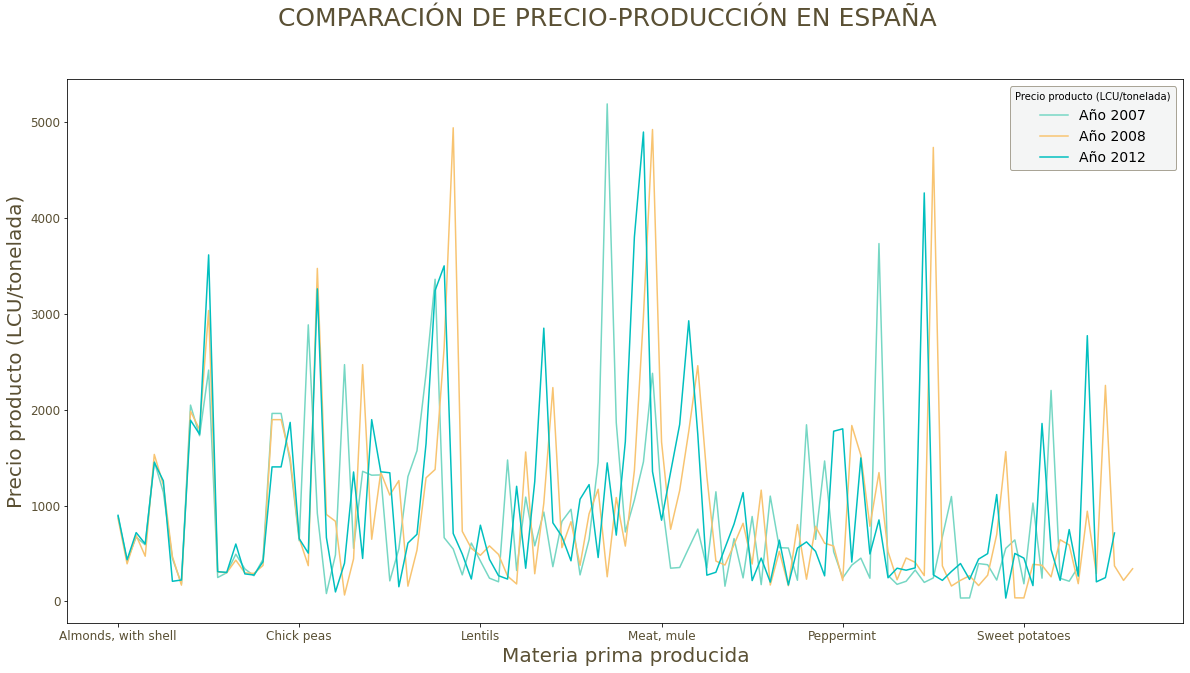

In [7]:
plt.figure(figsize=(20, 10))

year_price_2007.Value.plot(kind="line",label='Año 2007', color="#76D7C4")
year_price_2008.Value.plot(kind="line",label='Año 2008', color="#F8C471")
year_price_2012.Value.plot(kind="line",label='Año 2012',color="c")

plt.legend(title="Precio producto (LCU/tonelada)",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('COMPARACIÓN DE PRECIO-PRODUCCIÓN EN ESPAÑA', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Precio producto (LCU/tonelada)", size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=12,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Comparación_Precio-Producción_España_FAO.png')
plt.show()

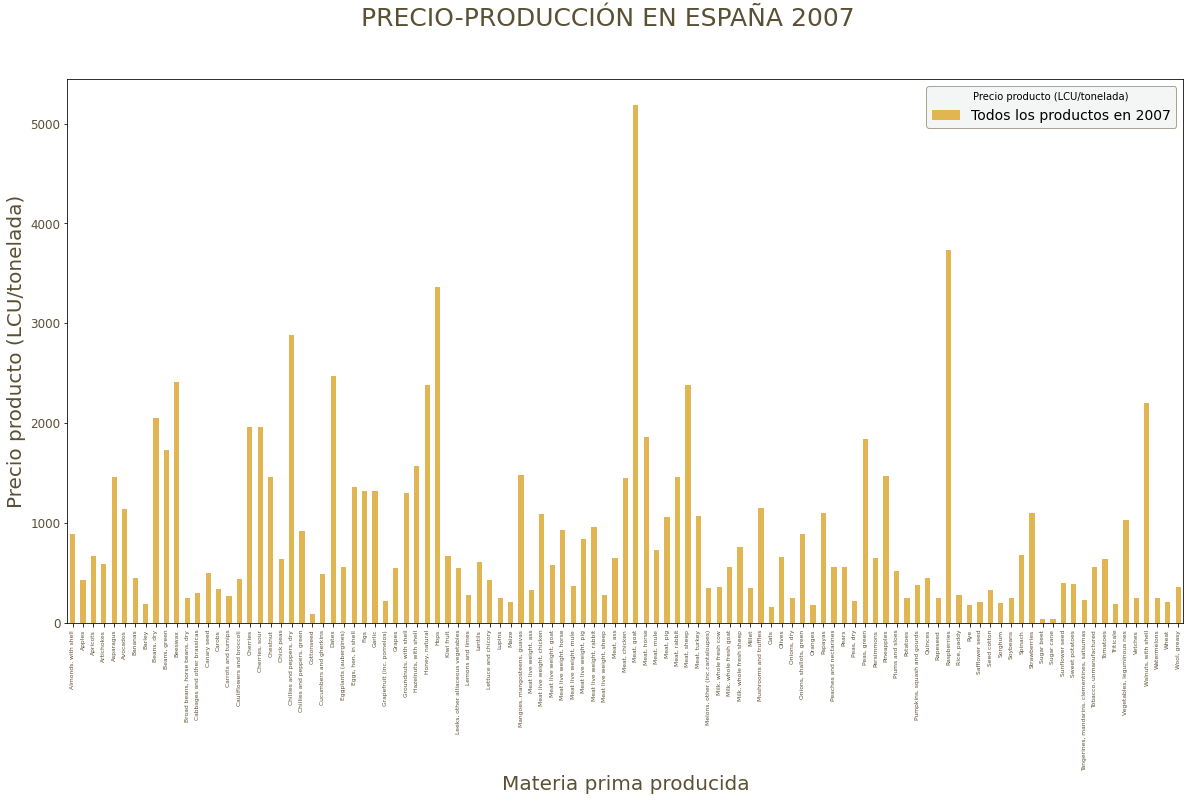

In [7]:
plt.figure(figsize=(20, 10))

year_price_2007.Value.plot(kind="bar",label='Todos los productos en 2007',align='center',color="#E2B553")

plt.legend(title="Precio producto (LCU/tonelada)",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRECIO-PRODUCCIÓN EN ESPAÑA 2007', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Precio producto (LCU/tonelada)", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Precio-Producción_España2007_FAO.png', transparent=True)
plt.show()

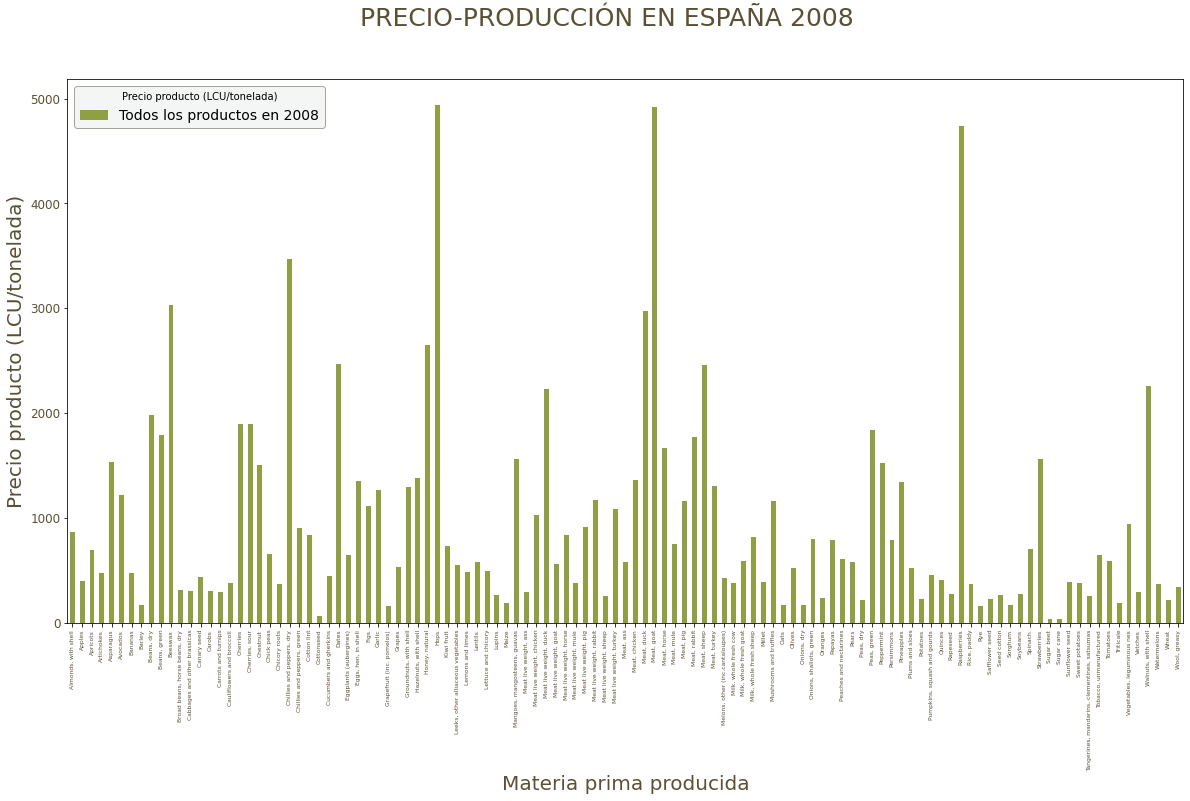

In [10]:
plt.figure(figsize=(20, 10))
year_price_2008.Value.plot(kind="bar",label='Todos los productos en 2008',align='center', color="#909F43")

plt.legend(title="Precio producto (LCU/tonelada)",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRECIO-PRODUCCIÓN EN ESPAÑA 2008', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Precio producto (LCU/tonelada)", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Precio-Producción_España2008_FAO.png',transparent=True)
plt.show()

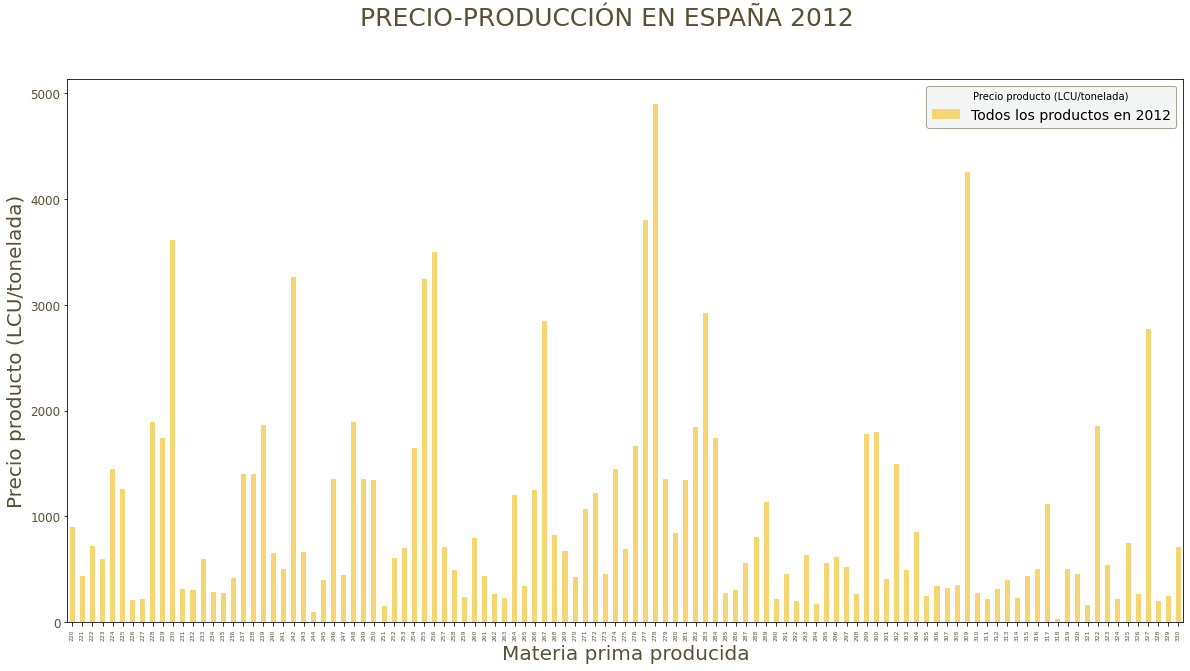

In [11]:
plt.figure(figsize=(20, 10))
year_price_2012.Value.plot(kind="bar",label='Todos los productos en 2012',align='center',color="#F6D573")

plt.legend(title="Precio producto (LCU/tonelada)",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRECIO-PRODUCCIÓN EN ESPAÑA 2012', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Precio producto (LCU/tonelada)", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Precio-Producción_España2012_FAO.png',transparent=True)
plt.show()

In [8]:
df2 = df.set_index("Item")

In [20]:
df2.index

Index(['Almonds, with shell', 'Apples', 'Apricots', 'Artichokes', 'Asparagus',
       'Avocados', 'Bananas', 'Barley', 'Beans, dry', 'Beans, green',
       ...
       'Tangerines, mandarins, clementines, satsumas',
       'Tobacco, unmanufactured', 'Tomatoes', 'Triticale',
       'Vegetables, leguminous nes', 'Vetches', 'Walnuts, with shell',
       'Watermelons', 'Wheat', 'Wool, greasy'],
      dtype='object', name='Item', length=331)

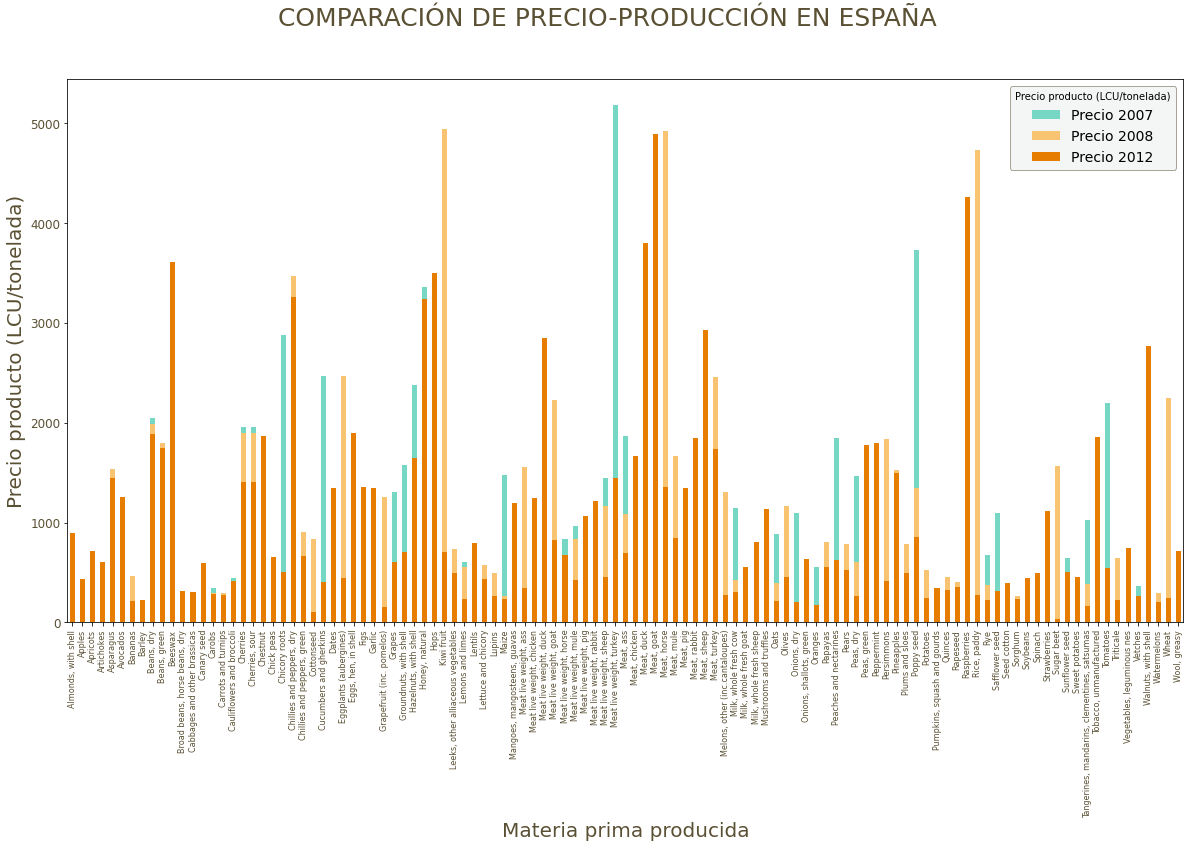

In [10]:
plt.figure(figsize=(20, 10))
df2[df2.Year == 2007].Value.plot(kind="bar",label='Precio 2007',color="#76D7C4")
df2[df2.Year == 2008].Value.plot(kind="bar",label='Precio 2008',color="#F8C471")
df2[df2.Year == 2012].Value.plot(kind="bar",label='Precio 2012',color="#E67C00")
plt.legend(title="Precio producto (LCU/tonelada)",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('COMPARACIÓN DE PRECIO-PRODUCCIÓN EN ESPAÑA', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Precio producto (LCU/tonelada)", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=8,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.savefig('Precio-Producción_España_anual_FAO.png',transparent=True)
plt.show()

Como comprobamos, la gran mayoria de los precios han descendido, sólo unos pocos se han mantenido. Ya hemos visto en gráficas anteriores que la materia prima más afectada han sido los cereales. 
Para ver la repercusión del precio de una manera más clara, mediante otro dataset, tengo la agrupación en agricultura, cultivo, cereales y comida, que relaciona Producción/Precio en $.


In [21]:
df3 = pd.read_csv("FAOSTAT_Production_Indices_8-10-2020.csv",encoding="ISO-8859-1",date_parser="Year")  
df3

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),2051,Agriculture (PIN),2007,2007,Int. $,100.22,Fc,Calculated data
1,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),2051,Agriculture (PIN),2008,2008,Int. $,100.11,Fc,Calculated data
2,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),2051,Agriculture (PIN),2012,2012,Int. $,92.79,Fc,Calculated data
3,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),1717,"Cereals,Total",2007,2007,Int. $,125.24,Fc,Calculated data
4,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),1717,"Cereals,Total",2008,2008,Int. $,122.55,Fc,Calculated data
5,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),1717,"Cereals,Total",2012,2012,Int. $,92.51,Fc,Calculated data
6,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),2041,Crops (PIN),2007,2007,Int. $,102.27,Fc,Calculated data
7,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),2041,Crops (PIN),2008,2008,Int. $,99.89,Fc,Calculated data
8,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),2041,Crops (PIN),2012,2012,Int. $,87.56,Fc,Calculated data
9,QI,Production Indices,203,Spain,436,Net Production Index Number (2004-2006 = 100),2054,Food (PIN),2007,2007,Int. $,100.54,Fc,Calculated data


In [22]:
df3 = df3.loc[:,["Area", "Item", "Year", "Value"]]
df3

,Area,Item,Year,Value
0,Spain,Agriculture (PIN),2007,100.22
1,Spain,Agriculture (PIN),2008,100.11
2,Spain,Agriculture (PIN),2012,92.79
3,Spain,"Cereals,Total",2007,125.24
4,Spain,"Cereals,Total",2008,122.55
5,Spain,"Cereals,Total",2012,92.51
6,Spain,Crops (PIN),2007,102.27
7,Spain,Crops (PIN),2008,99.89
8,Spain,Crops (PIN),2012,87.56
9,Spain,Food (PIN),2007,100.54


In [23]:
year2007= df3[df3.Year == 2007]
year2008= df3[df3.Year == 2008]
year2012= df3[df3.Year == 2012]
year2007.set_index("Year", inplace=True)
year2008.set_index("Year", inplace=True)
year2012.set_index("Year", inplace=True)

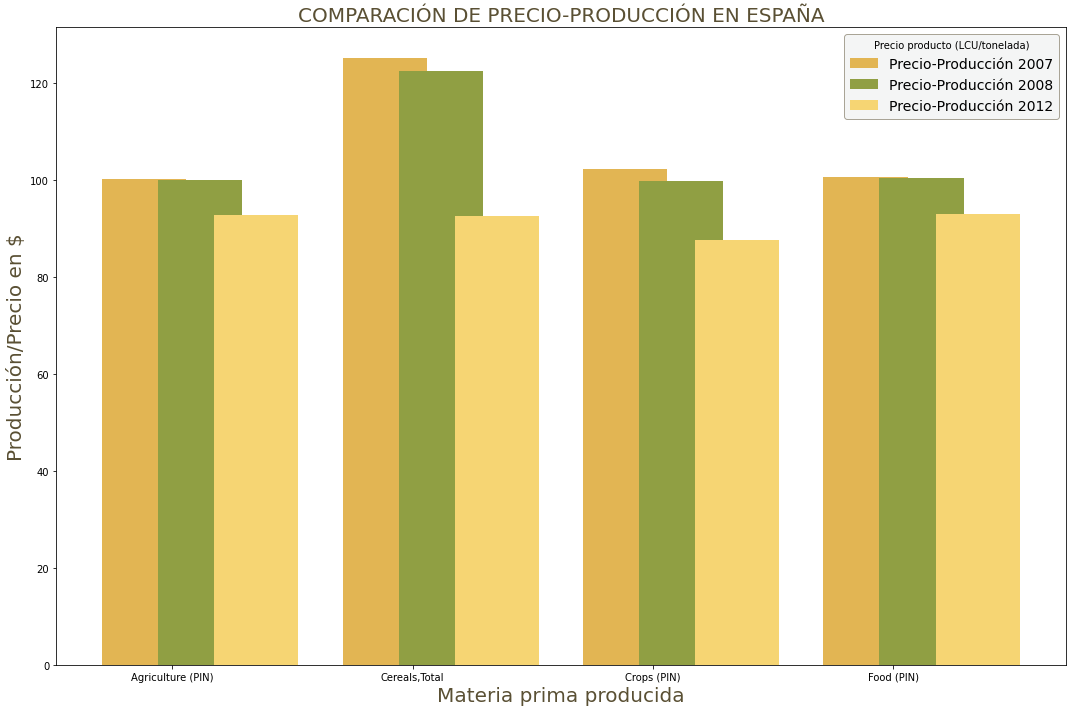

In [28]:
x = np.arange(len(year2007.Item))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/3, year2007.Value, width, label='Precio-Producción 2007', color="#E2B553")
rects2 = ax.bar(x + width/3, year2008.Value, width, label='Precio-Producción 2008', color="#909F43")
rects3 = ax.bar(x + width*3/3, year2012.Value, width, label='Precio-Producción 2012', color="#F6D573")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Producción/Precio en $", size=20, color="#5A5034")
ax.set_xlabel("Materia prima producida", size=20, color="#5A5034")
ax.set_title('COMPARACIÓN DE PRECIO-PRODUCCIÓN EN ESPAÑA', size=20, color="#5A5034")
ax.set_xticks(x)
ax.set_xticklabels(year2007.Item,rotation=0)
ax.legend(title="Precio producto (LCU/tonelada)",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)

fig.tight_layout()
plt.savefig('Producción-Precio_07-08-12_España_FAO.png',transparent=True)
plt.show()

De una manera muy clara en todas las agrupaciones comprobamos que hay un descenso del precio, que si es cierto que los cereales son los mayores perjudicados en esta crisis. Y que en 2008 no es que hubiera una crisis, sino que empezó una gran crisis que no terminaría hasta cuatro años después en 2012.

### Representacion de outliers:

Comprobación de outliers de la producción de la agricultura, los cereales, el cultivo y la comida que se ha producido en España en los años:
* 2007 un año antes de la crisis 
* 2008 año en la cual empezó la crisis en España
* 2012 año donde España tocó fondo y empezó a recuperar

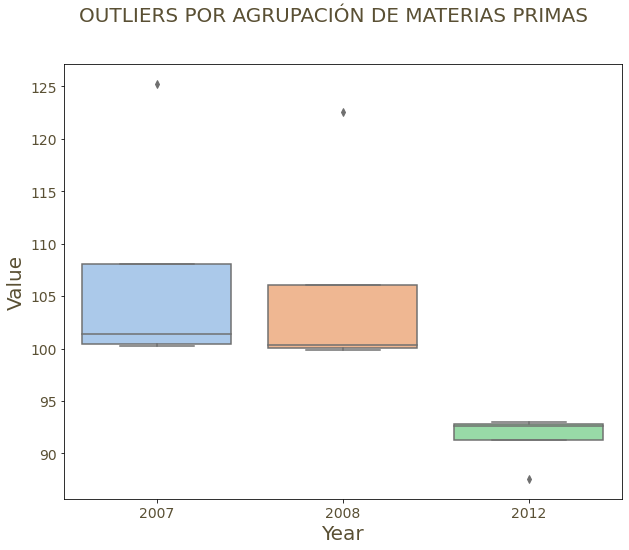

In [25]:
plt.figure(figsize=(10, 8))
 
ax = sns.boxplot(x="Year", y="Value", data=df3, palette="pastel")

plt.suptitle('OUTLIERS POR AGRUPACIÓN DE MATERIAS PRIMAS', size=20, color="#5A5034")
plt.xlabel("Year", size=20, color="#5A5034")
plt.ylabel("Value", size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=14,color="#5A5034")
plt.yticks(rotation=0,FontSize=14,color="#5A5034")
plt.savefig('Outliers_agrupación_materias_primas.png',transparent=True)
plt.show()

Se observa cómo la producción del conjunto de materias primas ha ido bajando desde que empezó la crisis y que en el año 2007 y 2008 hay casos atípicos que tienen características diferentes de las demás. Este tipo de casos no pueden ser caracterizados categóricamente como benéficos o problemáticos sino que deben ser contemplados en el contexto del análisis y debe evaluarse el tipo de información que pueden proporcionar. Sin embargo en 2012 el outliers es más cercano, estando por debajo de la media y no lo consideraría tan atípico a simple vista.

Comprobamos outliers en el producción en España en los años críticos;
* 2007 un año antes de la crisis 
* 2008 año en la cual empezó la crisis en España
* 2012 año donde España tocó fondo y empezó a recuperar

Volvemos a cargar el dataset:

In [3]:
df2 = pd.read_csv("Production_Crops_E_All_Data_(Normalized).csv",encoding="ISO-8859-1",date_parser="Year")  
df2 = df2.loc[:,["Area", "Item", "Year", "Value"]]
df2= df2[df2.Area == 'Spain'].set_index("Year")
df2 = df2.loc[[2007,2008,2012],:]
df2.reset_index("Year", inplace=True)
df2.set_index("Item",inplace=True)
df2

,Year,Area,Value
Item,,,
"Almonds, with shell",2007,Spain,563770.0
"Almonds, with shell",2007,Spain,3329.0
"Almonds, with shell",2007,Spain,187656.0
"Anise, badian, fennel, coriander",2007,Spain,1544.0
"Anise, badian, fennel, coriander",2007,Spain,6218.0
...,...,...,...
"Treenuts, Total",2012,Spain,4525.0
"Treenuts, Total",2012,Spain,265964.0
Vegetables Primary,2012,Spain,293490.0


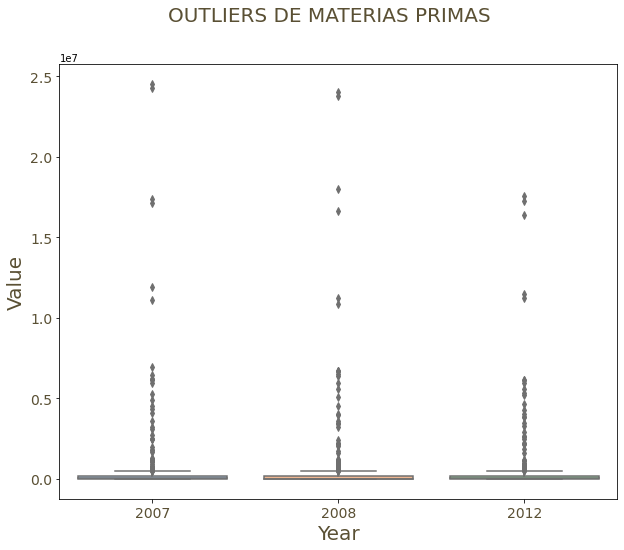

In [4]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x="Year", y="Value", data=df2, palette="pastel")

plt.suptitle('OUTLIERS DE MATERIAS PRIMAS', size=20, color="#5A5034")
plt.xlabel("Year", size=20, color="#5A5034")
plt.ylabel("Value", size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=14,color="#5A5034")
plt.yticks(rotation=0,FontSize=14,color="#5A5034")
plt.savefig('Outliers_materias_primas.png',transparent=True)
plt.show()

En esta gráfica observamos que la media de los datos es más homogénea en cuanto a las materias producidas y que en los tres años se producen outliers por encima de la media. 